In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv(r"C:\Users\Vansh\INFY.csv")
df=df.drop(['Symbol'],axis=1)
df=df.drop(['Series'],axis=1)
df=df.drop(['Prev Close'],axis=1)
df=df.drop(['Last'],axis=1)
df=df.drop(['VWAP'],axis=1)
df=df.drop(['Turnover'],axis=1)
df=df.drop(['Trades'],axis=1)
df=df.drop(['Deliverable Volume'],axis=1)
df=df.drop(['%Deliverble'],axis=1)
df

,Date,Open,High,Low,Close,Volume
0,03-01-2011,3444.00,3469.7,3427.70,3458.35,631068
1,04-01-2011,3457.00,3499.0,3457.00,3481.45,1014911
2,05-01-2011,3465.00,3477.0,3445.10,3459.60,440395
3,06-01-2011,3480.00,3493.0,3444.10,3478.15,586480
4,07-01-2011,3463.35,3495.0,3356.35,3370.75,1068866
...,...,...,...,...,...,...
2553,26-04-2021,1332.25,1351.3,1321.00,1343.55,7088606
2554,27-04-2021,1346.00,1353.0,1340.15,1348.50,3636115
2555,28-04-2021,1358.00,1359.5,1344.60,1356.00,4879234
2556,29-04-2021,1368.00,1369.0,1351.40,1356.35,5412357


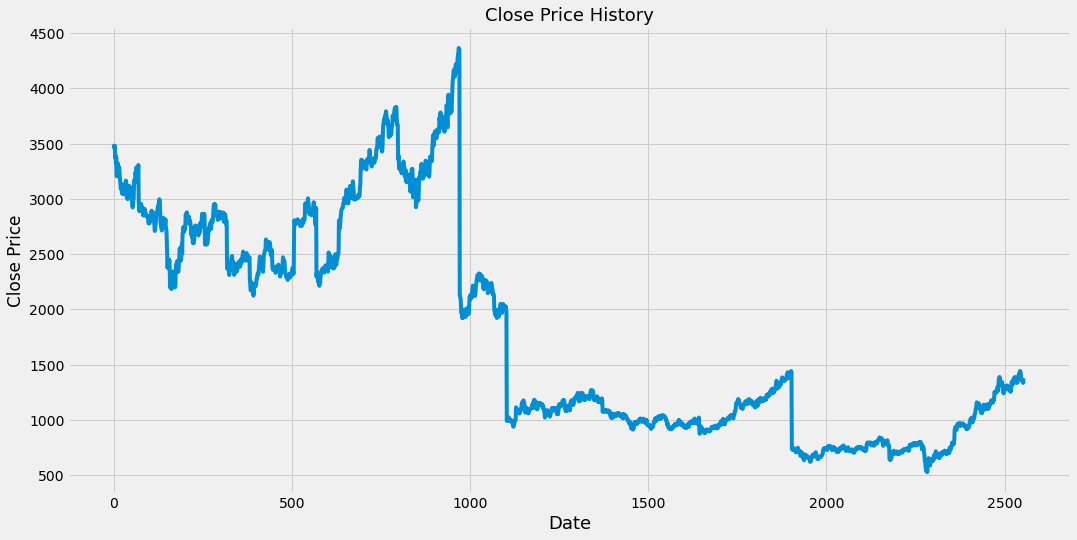

In [3]:
plt.figure(figsize=(16,8))
plt.title("Close Price History",fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price')
plt.show()

In [20]:
def SMA(data,period=30,column='Close'):
    return data[column].rolling(window=period).mean()

In [23]:
df['SMA']=SMA(df,21)

In [29]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Simple_Returns'] = df['Close'].pct_change(1)
df['Log_Returns']=np.log(1+df['Simple_Returns'])
df['Ratios']=df['Close']/df['SMA']

In [30]:
df

,Date,Open,High,Low,Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
0,03-01-2011,737.90,737.9,724.00,728.20,768310,NaN,NaN,NaN,NaN
1,04-01-2011,731.00,738.8,725.30,731.75,2071437,NaN,0.004875,0.004863,NaN
2,05-01-2011,727.80,727.8,706.15,708.10,1346235,NaN,-0.032320,-0.032854,NaN
3,06-01-2011,713.70,714.7,700.80,706.90,1579745,NaN,-0.001695,-0.001696,NaN
4,07-01-2011,703.10,708.7,680.00,683.90,2377426,NaN,-0.032536,-0.033078,NaN
...,...,...,...,...,...,...,...,...,...,...
2553,26-04-2021,2500.00,2534.1,2483.20,2509.80,3916088,2499.083333,0.004985,0.004973,1.004288
2554,27-04-2021,2494.15,2526.8,2486.25,2518.40,2040799,2499.488095,0.003427,0.003421,1.007566
2555,28-04-2021,2516.10,2609.0,2508.30,2577.00,3407461,2504.785714,0.023269,0.023002,1.028831
2556,29-04-2021,2590.90,2628.0,2533.00,2538.85,3005468,2508.028571,-0.014804,-0.014915,1.012289


In [31]:
df['Ratios'].describe()

count    2538.000000
mean        1.005584
std         0.039427
min         0.747983
25%         0.982164
50%         1.006037
75%         1.030045
max         1.157234
Name: Ratios, dtype: float64

In [45]:
percentiles=[5,20,50,80,95]
ratios=df['Ratios'].dropna()
percentile_values=np.percentile(ratios,percentiles)
percentile_values

array([0.94392951, 0.9761704 , 1.00603695, 1.03615385, 1.0673194 ])

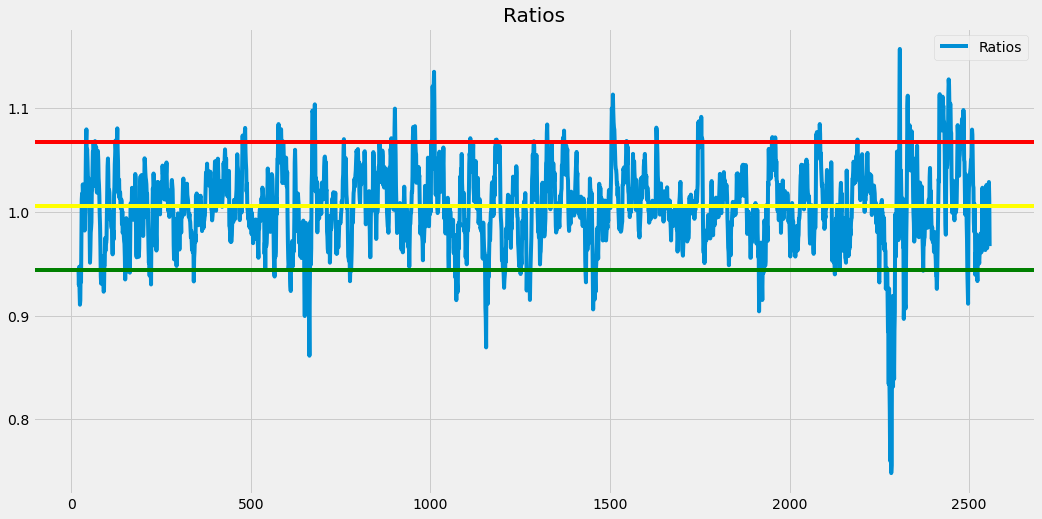

In [46]:
plt.figure(figsize=(16,8))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend=True)
plt.axhline(percentile_values[0],c='Green',label='5th Percentile')
plt.axhline(percentile_values[2],c='Yellow',label='50th Percentile')
plt.axhline(percentile_values[-1],c='Red',label='95th Percentile')